<a href="https://colab.research.google.com/github/abroraxatov1/dataset1/blob/main/Crop_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Recommendation System Based on Soil and Seasonal Weather Conditions

Agriculture is one of the most vital sectors of the global economy. With the increasing need for efficient farming practices and better yield, it is important to help farmers make informed decisions.

This project focuses on building a crop recommendation system that analyzes soil properties and seasonal weather patterns to suggest the most suitable crop for a given condition.

We used a real-world dataset containing soil nutrients, pH, micro-elements, and weather indicators such as rainfall, temperature, and humidity to predict the best crop to grow.

The goal is to empower farmers with accurate, data-driven recommendations that can lead to better productivity and sustainability in agriculture.


In this project, I wanted to explore how data science and machine learning can directly benefit agriculture. The idea is simple: if we know what's in the soil and how the weather behaves across seasons, we can make smarter decisions about which crop to plant. This kind of system could be very useful for precision agriculture.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Crop Recommendation using Soil Properties and Weather Prediction.csv')
df.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [2]:
# Basic structure of the dataset
df.shape
df.columns
df.describe()
df['label'].value_counts()


,count
label,
Teff,1260
Maize,732
Wheat,715
Barley,503
Bean,253
Pea,94
Sorghum,72
Dagussa,71
Niger seed,64


<ipython-input-30-dc39a330252b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')


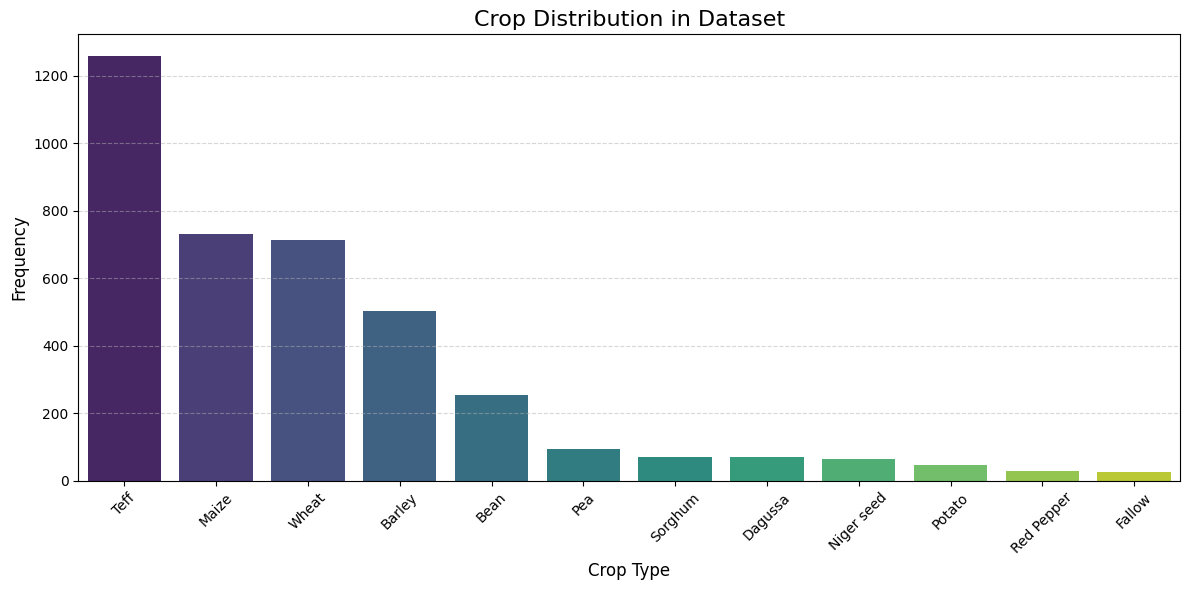

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.title("Crop Distribution in Dataset", fontsize=16)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


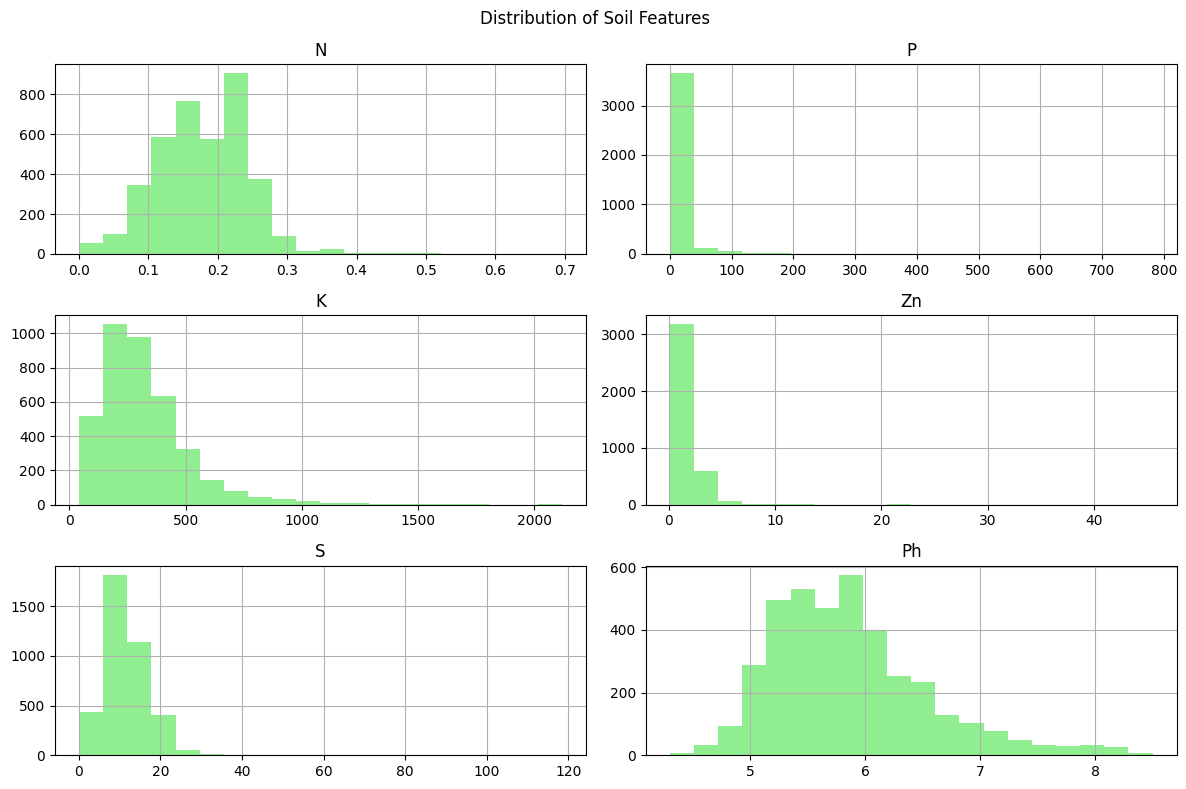

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

soil_features = ['N', 'P', 'K', 'Zn', 'S', 'Ph']
df[soil_features].hist(bins=20, figsize=(12, 8), color='lightgreen')
plt.suptitle('Distribution of Soil Features')
plt.tight_layout()
plt.show()


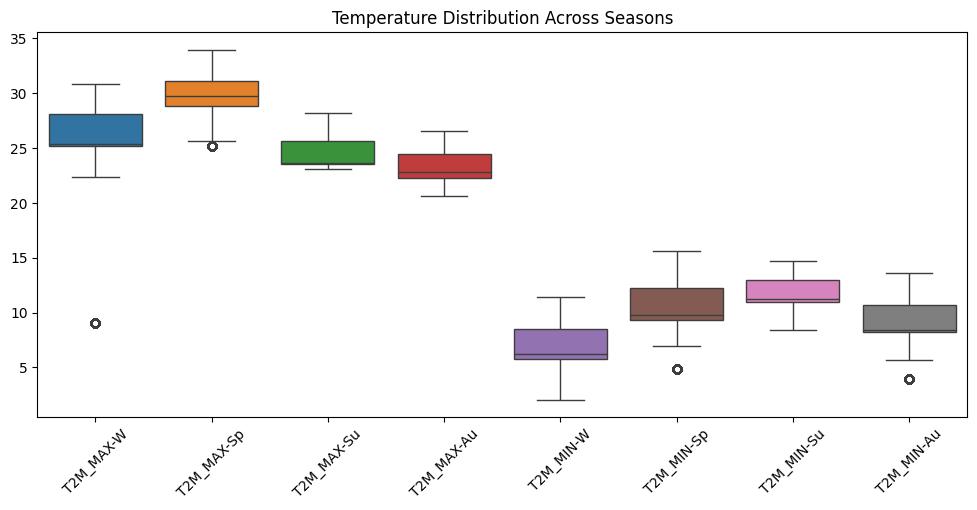

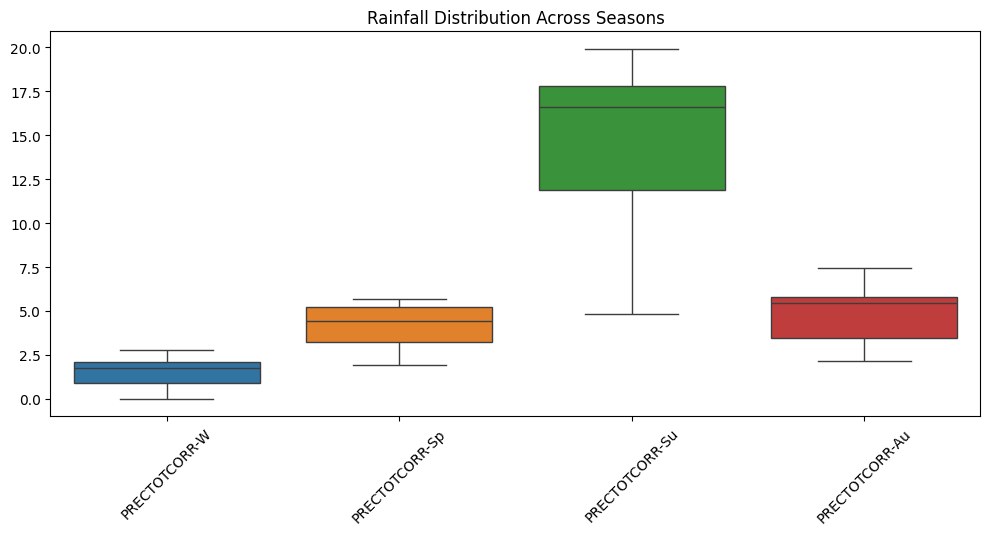

In [4]:
seasonal_temp = [col for col in df.columns if 'T2M' in col]
seasonal_rain = [col for col in df.columns if 'PRECTOTCORR' in col]

plt.figure(figsize=(12, 5))
sns.boxplot(data=df[seasonal_temp])
plt.title('Temperature Distribution Across Seasons')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df[seasonal_rain])
plt.title('Rainfall Distribution Across Seasons')
plt.xticks(rotation=45)
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import LabelEncoder


encoder=LabelEncoder()

df['label'] = encoder.fit_transform(df['label'].values)
df['Soilcolor'] = encoder.fit_transform(df['Soilcolor'].values)

# Prepare features and target
X = df.drop(columns=['label'])
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create average feature vector for each crop
crop_profiles = pd.DataFrame(X_scaled, columns=X.columns).groupby(y).mean()

# Simulate a new soil-weather profile (random example)
sample_profile = X.iloc[100:101]
sample_scaled = scaler.transform(sample_profile)

# Compute cosine similarity with each crop profile
similarities = cosine_similarity(sample_scaled, crop_profiles)
recommended_crop = crop_profiles.index[similarities.argmax()]
print("Recommended Crop:", recommended_crop)


Recommended Crop: 0


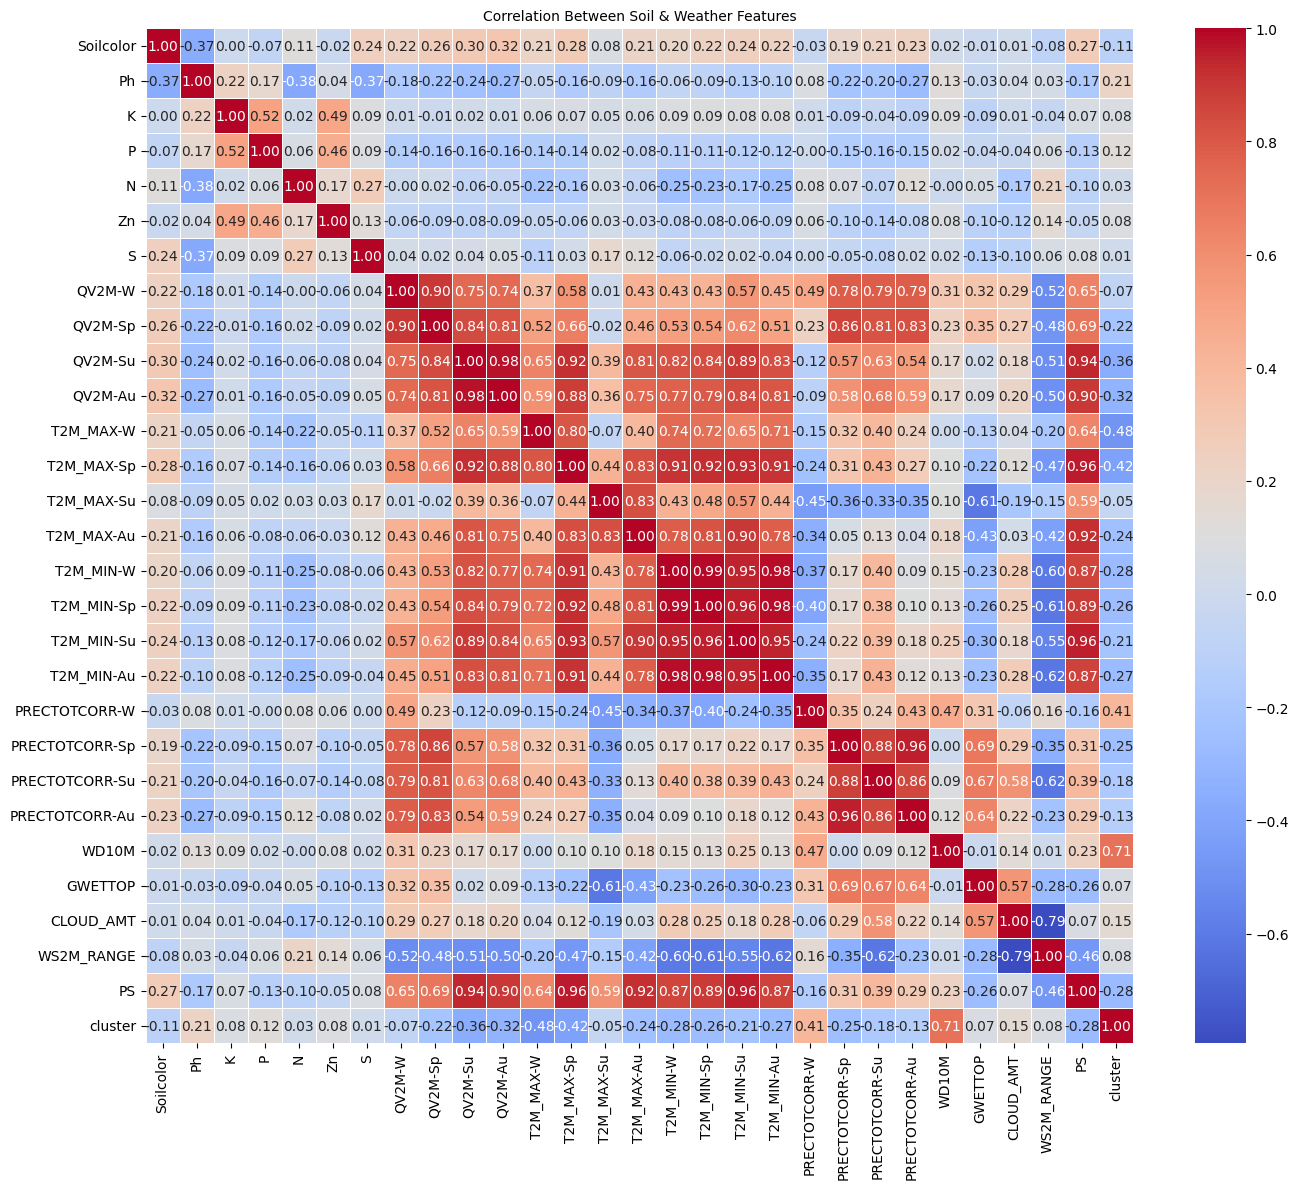

In [34]:
encoder=LabelEncoder()

df['label'] = encoder.fit_transform(df['label'].values)
df['Soilcolor'] = encoder.fit_transform(df['Soilcolor'].values)

plt.figure(figsize=(14, 12))
sns.heatmap(df.drop(columns='label').corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Soil & Weather Features", fontsize=10)
plt.tight_layout()
plt.show()


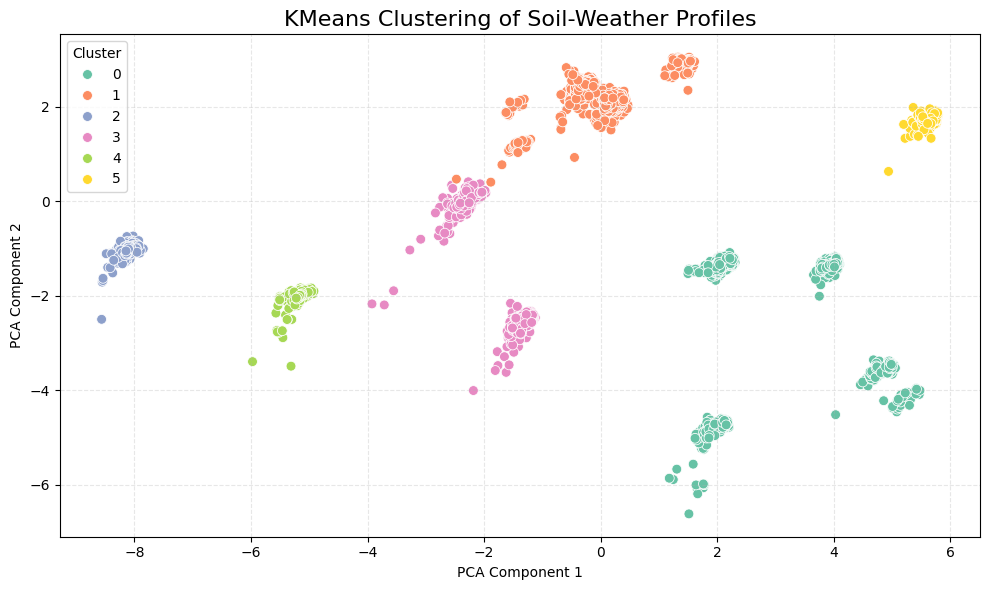

In [36]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2', s=50)
plt.title("KMeans Clustering of Soil-Weather Profiles", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


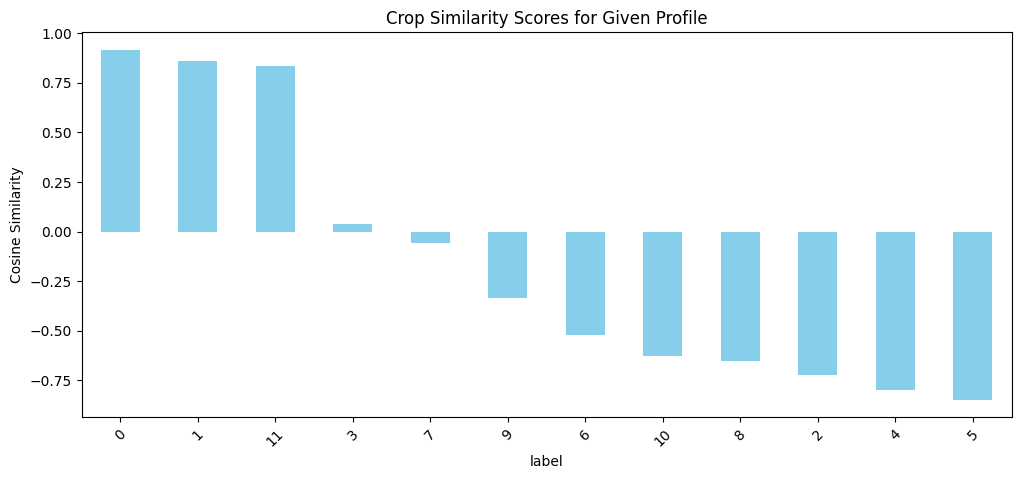

In [8]:
import matplotlib.pyplot as plt

# Convert similarities to a Series for easy plotting
sim_scores = pd.Series(similarities.flatten(), index=crop_profiles.index)
sim_scores.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), color='skyblue')
plt.ylabel('Cosine Similarity')
plt.title('Crop Similarity Scores for Given Profile')
plt.xticks(rotation=45)
plt.show()


In [15]:
# Let's say the farmer previously grew 'Teff'
previous_crop_name = 'Barley'

# Check if the previous_crop_name is a known label by the encoder
if previous_crop_name in encoder.classes_:
    # Get the numerical label for 'Teff'
    previous_crop_label = encoder.transform([previous_crop_name])[0]

    # Get the profile of this crop using the numerical label
    wheat_profile = crop_profiles.loc[previous_crop_label].values.reshape(1, -1)

    # Calculate similarity with all other crops
    similarities = cosine_similarity(wheat_profile, crop_profiles)

    # Convert the numerical labels back to crop names for the similarity scores
    # This requires mapping the numerical index of crop_profiles back to original crop names
    # A simple way is to create a mapping from encoded labels to original labels
    # Ensure 'original_label' column exists or map from the original df['label'] before encoding
    # We need the original df['label'] for this mapping.
    # Let's recreate the label mapping using the original labels
    # Assuming you have access to the original df before encoding 'label'
    # If not, you might need to store the original labels alongside the encoded ones.

    # Assuming we have the original df or a mapping
    # Let's regenerate the mapping using the encoder's classes and the inverse transform
    # This requires the original labels which are lost after encoding.
    # A better approach is to save the original labels before encoding.
    # Let's assume for now we can recreate the mapping by inversing the encoder on its classes
    original_labels = encoder.inverse_transform(encoder.classes_)
    label_mapping = pd.Series(original_labels, index=encoder.classes_)


    similar_crops = pd.Series(similarities.flatten(), index=crop_profiles.index).sort_values(ascending=False)
    # Map the index from encoded label to original crop name
    similar_crops.index = similar_crops.index.map(label_mapping)


    # Recommend top 5 similar crops (excluding itself)
    # Use .get() with a default value to handle cases where previous_crop_name is not in the index after mapping
    recommended = similar_crops.drop(previous_crop_name, errors='ignore').head(5)
    print(f"Recommended Crops similar to {previous_crop_name}:", recommended.index.tolist())
else:
    print(f"'{previous_crop_name}' is not a known crop in the dataset.")

'Barley' is not a known crop in the dataset.


In [16]:
from sklearn.cluster import KMeans

# Cluster soil-weather profiles
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# For a new profile, assign to a cluster
new_profile_cluster = kmeans.predict(sample_scaled)

# Get most common crops in this cluster
common_crops = df[df['cluster'] == new_profile_cluster[0]]['label'].value_counts().head(3)
print("Top recommended crops:", common_crops.index.tolist())


Top recommended crops: ['Barley', 'Wheat', 'Bean']


In [17]:
from sklearn.neighbors import NearestNeighbors

# Fit KNN on user profiles
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_scaled)

# Find nearest neighbors for a new profile
distances, indices = knn.kneighbors(sample_scaled)

# Get crops grown in those similar profiles
nearest_crops = y.iloc[indices[0]]
recommendation = nearest_crops.value_counts().head(1)
print("KNN Recommendation:", recommendation.index[0])


KNN Recommendation: 0


In [21]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split # Assuming you need this for the next cell

# Assuming X, y, scaler_nmf, sample_profile are already defined from previous cells

# Encode crop labels
# Use the same encoder used before if you want to reference the same categories
# If not, re-initialize and fit. Assuming encoder from the previous cell is okay.
# encoder = OneHotEncoder()
# Y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Scale features to be non-negative for NMF
# Replace StandardScaler with MinMaxScaler
# scaler_nmf = MinMaxScaler() # Assuming scaler_nmf is already fitted
X_scaled_nmf = scaler_nmf.transform(X) # Use the already fitted scaler

# Apply NMF
nmf = NMF(n_components=10, random_state=42)
W = nmf.fit_transform(X_scaled_nmf)
H = nmf.components_

# Reconstruct scores for all samples
reconstructed_all = W @ H

# Add the original crop labels (encoded) back to the reconstructed data for grouping
reconstructed_df = pd.DataFrame(reconstructed_all, columns=X.columns)
reconstructed_df['label'] = y # Assuming y contains the encoded labels

# Create average reconstructed feature vector for each crop based on NMF output
average_reconstructed_crop_profiles = reconstructed_df.groupby('label').mean()

# Scale the sample profile using the fitted MinMaxScaler
sample_scaled_nmf = scaler_nmf.transform(sample_profile)

# Transform the scaled sample profile using the fitted NMF model
# This gives the sample's representation in the NMF component space
sample_W = nmf.transform(sample_scaled_nmf)

# Now, to recommend a crop, we can find which *average reconstructed crop profile* is closest
# in the feature space to the reconstructed profile of the sample from NMF's W and H components.
# Alternatively, we can compare the sample's reconstructed profile directly to the average reconstructed profiles.

# Let's calculate the cosine similarity between the sample's reconstructed profile
# and the average reconstructed profiles for each crop.

# Reconstruct the sample profile using its NMF components and H
sample_reconstructed = sample_W @ H

# Calculate cosine similarity between the sample's reconstructed profile
# and the average reconstructed crop profiles
from sklearn.metrics.pairwise import cosine_similarity
similarities_nmf = cosine_similarity(sample_reconstructed, average_reconstructed_crop_profiles)

# Find the index of the crop with the highest similarity
recommended_crop_encoded_label = average_reconstructed_crop_profiles.index[similarities_nmf.argmax()]

# Convert the encoded label back to the original crop name using the encoder
# Assuming the encoder used for 'label' is still available and fitted on the original labels
# (which was done in a previous cell)
recommended_crop_name = encoder.inverse_transform([recommended_crop_encoded_label])[0]


print("NMF Recommended Crop:", recommended_crop_name)

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Simple neural model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_scaled, y_encoded, epochs=10, batch_size=32, verbose=0)

# Predict
pred = model.predict(sample_scaled)
pred_crop = le.inverse_transform([pred.argmax()])
print("NN-based recommended crop:", pred_crop[0])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
NN-based recommended crop: 0


In [29]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Use KNeighborsClassifier instead of NearestNeighbors for classification
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Now use the predict method from KNeighborsClassifier
y_pred = knn_classifier.predict(X_test)

# Ensure target_names matches the classes from the LabelEncoder
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       121
           1       0.19      0.20      0.19        41
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3
           4       0.47      0.63      0.54       141
           5       0.00      0.00      0.00        15
           6       0.25      0.20      0.22        15
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        14
          10       0.60      0.69      0.64       254
          11       0.47      0.39      0.43       140

    accuracy                           0.49       774
   macro avg       0.21      0.21      0.21       774
weighted avg       0.46      0.49      0.47       774



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
